In [244]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data/redux'
#Allow relative imports to directories above lesson1/
sys.path.insert(1, os.path.join(sys.path[0], '..'))

#import modules
from utils import *
from vgg16 import Vgg16

import time

from keras.preprocessing import image

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

In [4]:
# iniialize the model
vgg = Vgg16()

In [6]:
batch_size = 32
epochs = 1
path = DATA_HOME_DIR + '/sample/'

In [16]:
train_batches = vgg.get_batches(path + 'train/', batch_size=batch_size)
valid_batches = vgg.get_batches(path + 'valid/', batch_size=batch_size)
vgg.finetune(train_batches)

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [18]:
for e in range(epochs):
    vgg.fit(train_batches, valid_batches)

Epoch 1/1
200/200 [==============================] - 7s - loss: 1.2509 - acc: 0.6850 - val_loss: 0.0798 - val_acc: 0.9800


In [246]:
vgg.model.save_weights(path + 'results/model' + str(time.time()))

In [247]:
path

'/home/ubuntu/courses/deeplearning1/lesson1/data/redux/sample/'

In [249]:
vgg.model.load_weights(DATA_HOME_DIR + '/results/ft1.h5')

In [250]:
test_batches, preds = vgg.test(path + 'valid/', batch_size=batch_size)

Found 50 images belonging to 2 classes.


In [251]:
test_batches.class_indices

{'cats': 0, 'dogs': 1}

In [252]:
print preds[:5]
print test_batches.filenames[:5]

[[  1.0000e+00   0.0000e+00]
 [  1.0000e+00   0.0000e+00]
 [  7.2090e-41   1.0000e+00]
 [  1.0000e+00   0.0000e+00]
 [  1.0000e+00   0.0000e+00]]
['cats/cat.6779.jpg', 'cats/cat.3085.jpg', 'cats/cat.7669.jpg', 'cats/cat.21.jpg', 'cats/cat.7532.jpg']


In [253]:
def onehot(batches):
    num_classes = len(batches.class_indices)
    return np.equal(batches.classes, np.matrix(np.arange(num_classes)).T).T.astype(int)

In [266]:
def logloss(batches, preds):
    preds = np.clip(preds, 0.0001, 0.9999)
    v1 = np.multiply(test_batches.classes, np.log(preds[:, 1]))
    v2 = np.multiply(1-test_batches.classes, np.log(1-preds[:, 1]))
    return np.sum(np.add(v1, v2)) / -test_batches.N

In [267]:
logloss(test_batches, preds)

0.18430151237160317

In [293]:
labels = ["dog" if dog else "cat" for dog in np.round(1-preds[:, 0]).astype(bool)]
correct_labels = our_labels == test_batches.classes
correct_cats = correct_labels & (test_batches.classes==0)
correct_dogs = correct_labels & (test_batches.classes==1)
wrong_cats = ~correct_labels & (test_batches.classes==0)
wrong_dogs = ~correct_labels & (test_batches.classes==1)

In [294]:
def plot_images(batches, labels, preds, idxs, num, path):
    if len(idxs) == 0:
        return
    idxs = np.random.choice(idxs, num)
    filenames = [path + batches.filenames[i] for i in idxs]
    labels = [str(labels[i]) + " " + str(preds[i]) for i in idxs]
    plots([image.load_img(f) for f in filenames], titles=labels)

# Wrong dogs

In [295]:
plot_images(test_batches, labels, 1-preds[:, 0], np.where(wrong_dogs)[0], 4, path + 'valid/')

# Wrong cats

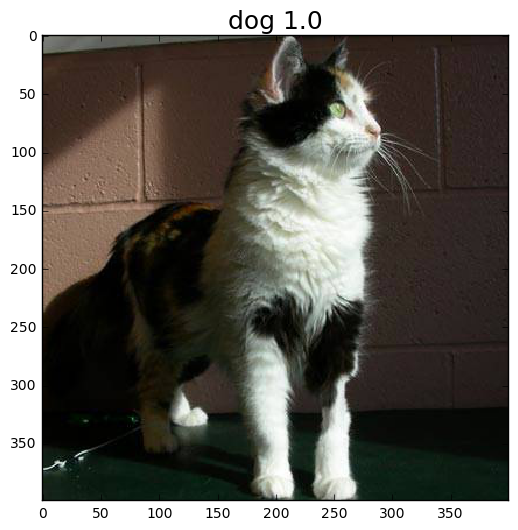

In [296]:
plot_images(test_batches, labels, 1-preds[:, 0], np.where(wrong_cats)[0], 1, path + 'valid/')

# Correct dogs

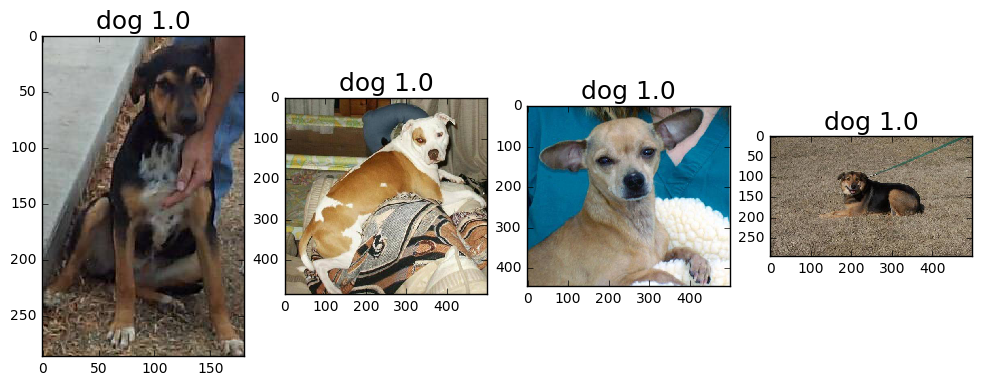

In [297]:
plot_images(test_batches, labels, 1-preds[:, 0], np.where(correct_dogs)[0], 4, path + 'valid/')

# Correct cats

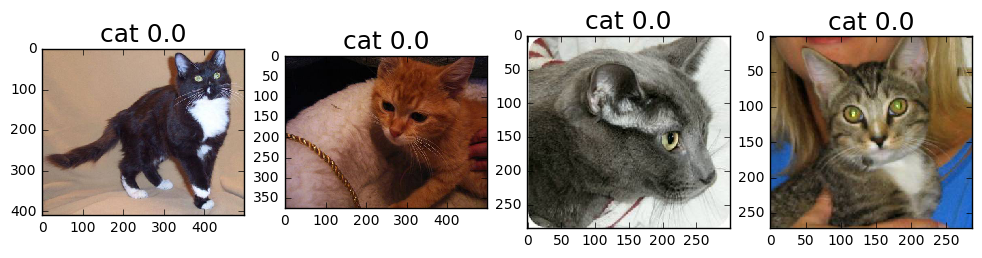

In [298]:
plot_images(test_batches, labels, 1-preds[:, 0], np.where(correct_cats)[0], 4, path + 'valid/')